<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/birth_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

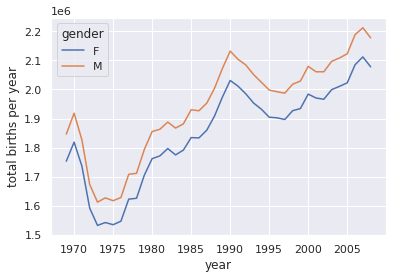

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# use Seaborn styles
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [5]:
# シグマクリップ
qualities = np.percentile(births['births'], [25, 50, 75, 99])
mu = qualities[1]
# サンプル平均のロバスト推定
# 四分位範囲(IQR=percentile(75%) - percentile(25%))は標準偏差=1の場合、IQR = 1.3489
# この値で割ることでNormalizedすると、NIQR = 1/1.3489 * IQR = 0.74 * IQR
sig = 0.74 * (qualities[2] - qualities[0])

In [ ]:
qualities

array([  4358.  ,   4814.  ,   5289.5 , 173806.44])

In [ ]:
sig

689.31

In [6]:
bq = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
bq['day'] = bq['day'].astype(int)
bq.index = pd.to_datetime(10000 * bq.year + 100 * bq.month + bq.day, format='%Y%m%d')
bq['dayofweek'] = bq.index.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'mean births by day')

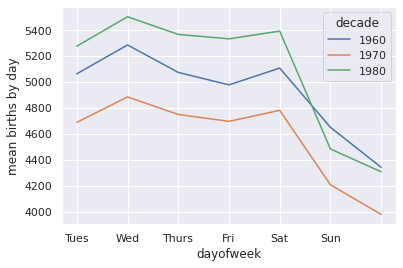

In [7]:
bq.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [10]:
# 年は考慮せず、月日のみで集約
# aggfuncは指定なしなので、defaultのmeanとなる
births_by_date = bq.pivot_table('births', [bq.index.month, bq.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [12]:
# ダミーの年を2012と設定
# 2/29を処理できるようにうるう年にする必要がある
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index] # pythonのリスト内包表記
births_by_date.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


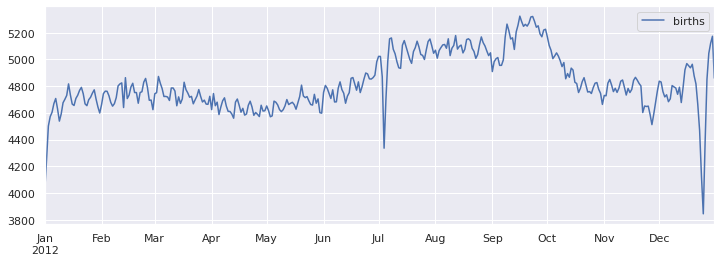

In [15]:
# 月日ごとの出生率の変化をグラフ化
# 大きく出生率が下がるのは国民の休日
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)